In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df_2016 =pd.read_csv ("../data/raw/survey_2016.csv", low_memory=False)


In [2]:


display(df_2016)

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1428,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Not applicable to me,Not applicable to me,34,Female,United States of America,New York,United States of America,New York,Other,Sometimes
1429,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Often,56,MALE,United States of America,California,Afghanistan,NaN,Support,Sometimes
1430,0,100-500,1.0,NaN,Yes,Yes,Yes,Yes,I don't know,Somewhat difficult,...,Rarely,Sometimes,52,Male,United States of America,Georgia,United States of America,Georgia,Back-end Developer,Sometimes
1431,0,100-500,0.0,1.0,I don't know,I am not sure,No,Yes,I don't know,Somewhat difficult,...,Sometimes,Often,30,Female,United States of America,Nebraska,United States of America,Nebraska,DevOps/SysAdmin,Sometimes


In [3]:
column_mapping = {
    'Are you self-employed?': 'self_employed',
    'How many employees does your company or organization have?': 'no_employees',
    'Is your employer primarily a tech company/organization?': 'tech_company',
    'Is your primary role within your company related to tech/IT?': 'tech_role',
    'Does your employer provide mental health benefits as part of healthcare coverage?': 'benefits',
    'Do you know the options for mental health care available under your employer-provided coverage?': 'care_options',
    'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?': 'wellness_program',
    'Does your employer offer resources to learn more about mental health concerns and options for seeking help?': 'seek_help',
    'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?': 'anonymity',
    'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:': 'medical_leave',
    'Do you think that discussing a mental health disorder with your employer would have negative consequences?': 'mental_health_consequence',
    'Do you think that discussing a physical health issue with your employer would have negative consequences?': 'phys_health_consequence',
    'Would you feel comfortable discussing a mental health disorder with your coworkers?': 'coworkers',
    'Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?': 'supervisor',
    'Do you feel that your employer takes mental health as seriously as physical health?': 'mental_vs_physical',
    'Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?': 'obs_consequence',
    'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?': 'mental_health_coverage',
    'Do you know local or online resources to seek help for a mental health disorder?': 'local_resources',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?': 'reveal_to_clients',
    'If you have revealed a mental health issue to a client or business contact, do you believe this has impacted you negatively?': 'client_impact',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?': 'reveal_to_coworkers',
    'If you have revealed a mental health issue to a coworker or employee, do you believe this has impacted you negatively?': 'coworker_impact',
    'Do you believe your productivity is ever affected by a mental health issue?': 'productivity_impact',
    'If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?': 'work_time_impact',
    'Do you have previous employers?': 'previous_employers',
    'Have your previous employers provided mental health benefits?': 'previous_benefits',
    'Were you aware of the options for mental health care provided by your previous employers?': 'previous_care_options',
    'Did your previous employers ever formally discuss mental health (as part of a wellness campaign or other official communication)?': 'previous_wellness_program',
    'Did your previous employers provide resources to learn more about mental health issues and how to seek help?': 'previous_seek_help',
    'Was your anonymity protected if you chose to take advantage of mental health or substance abuse treatment resources with previous employers?': 'previous_anonymity',
    'Do you think that discussing a mental health disorder with previous employers would have negative consequences?': 'previous_mental_health_consequence',
    'Do you think that discussing a physical health issue with previous employers would have negative consequences?': 'previous_phys_health_consequence',
    'Would you have been willing to discuss a mental health issue with your previous co-workers?': 'previous_coworkers',
    'Would you have been willing to discuss a mental health issue with your direct supervisor(s)?': 'previous_supervisor',
    'Did you feel that your previous employers took mental health as seriously as physical health?': 'previous_mental_vs_physical',
    'Did you hear of or observe negative consequences for co-workers with mental health issues in your previous workplaces?': 'previous_obs_consequence',
    'Would you be willing to bring up a physical health issue with a potential employer in an interview?': 'phys_health_interview',
    'Why or why not?': 'phys_health_interview_reason',
    'Would you bring up a mental health issue with a potential employer in an interview?': 'mental_health_interview',
    'Why or why not?.1': 'mental_health_interview_reason',
    'Do you feel that being identified as a person with a mental health issue would hurt your career?': 'mental_health_career_impact',
    'Do you think that team members/co-workers would view you more negatively if they knew you suffered from a mental health issue?': 'coworker_perception',
    'How willing would you be to share with friends and family that you have a mental illness?': 'share_with_family',
    'Have you observed or experienced an unsupportive or badly handled response to a mental health issue in your current or previous workplace?': 'observed_bad_response',
    'Have your observations of how another individual who discussed a mental health disorder made you less likely to reveal a mental health issue yourself in your current workplace?': 'observed_impact',
    'Do you have a family history of mental illness?': 'family_history',
    'Have you had a mental health disorder in the past?': 'past_mental_health_disorder',
    'Do you currently have a mental health disorder?': 'current_mental_health_disorder',
    'If yes, what condition(s) have you been diagnosed with?': 'current_conditions_diagnosed',
    'If maybe, what condition(s) do you believe you have?': 'suspected_conditions',
    'Have you been diagnosed with a mental health condition by a medical professional?': 'diagnosed_conditions',
    'If so, what condition(s) were you diagnosed with?': 'diagnosed_conditions_detail',
    'Have you ever sought treatment for a mental health issue from a mental health professional?': 'sought_treatment',
    'If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?': 'work_interfere_treated',
    'If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?': 'work_interfere_untreated',
    'What is your age?': 'age',
    'What is your gender?': 'sex',
    'What country do you live in?': 'country',
    'What US state or territory do you live in?': 'state',
    'What country do you work in?': 'work_country',
    'What US state or territory do you work in?': 'work_state',
    'Which of the following best describes your work position?': 'work_position',
    'Do you work remotely?': 'remote_work'
}

# Renaming the columns
df_2016 = df_2016.rename(columns=column_mapping)

# Now you can check the new column names
print(df_2016.columns)

Index(['self_employed', 'no_employees', 'tech_company', 'tech_role',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'medical_leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_vs_physical', 'obs_consequence',
       'Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?',
       'local_resources', 'reveal_to_clients', 'client_impact',
       'reveal_to_coworkers', 'coworker_impact', 'productivity_impact',
       'work_time_impact', 'previous_employers', 'previous_benefits',
       'previous_care_options', 'previous_wellness_program',
       'previous_seek_help', 'previous_anonymity',
       'previous_mental_health_consequence',
       'previous_phys_health_consequence', 'previous_coworkers',
       'previous_supervisor', 'previous_mental_vs_physical',
       'previous_obs_consequence', 'phys_health_interview',
       'phy

In [3]:
df_2016["country"].value_counts()

KeyError: 'country'

In [5]:
!pip install pycountry

In [6]:
import pycountry
print(pycountry.countries)

In [7]:
import pycountry

# List of European countries
european_countries = [
    country.name for country in pycountry.countries
    if country.alpha_2 in {
        'AL', 'AD', 'AM', 'AT', 'AZ', 'BY', 'BE', 'BA', 'BG', 'HR', 'CY', 'CZ', 'DK', 'EE', 'FI', 'FR', 'GE', 'DE', 
        'GR', 'HU', 'IS', 'IE', 'IT', 'KZ', 'XK', 'LV', 'LI', 'LT', 'LU', 'MT', 'MD', 'MC', 'ME', 'NL', 'MK', 'NO', 
        'PL', 'PT', 'RO', 'RU', 'SM', 'RS', 'SK', 'SI', 'ES', 'SE', 'CH', 'UA', 'GB', 'VA'
    }
]

print(european_countries)

def grouped_countries(country):
    if country in european_countries:
        return "Europe"
    else:
        return country

df_2016["country"] = df_2016["country"].apply(grouped_countries)

df_2016["country"].value_counts()

#European countries grouped into Europe

['Albania', 'Andorra', 'Armenia', 'Austria', 'Azerbaijan', 'Belgium', 'Bulgaria', 'Bosnia and Herzegovina', 'Belarus', 'Switzerland', 'Cyprus', 'Czechia', 'Germany', 'Denmark', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom', 'Georgia', 'Greece', 'Croatia', 'Hungary', 'Ireland', 'Iceland', 'Italy', 'Kazakhstan', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Latvia', 'Monaco', 'Moldova, Republic of', 'North Macedonia', 'Malta', 'Montenegro', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Romania', 'Russian Federation', 'San Marino', 'Serbia', 'Slovakia', 'Slovenia', 'Sweden', 'Ukraine', 'Holy See (Vatican City State)']


country
United States of America    840
Europe                      406
Canada                       78
Australia                    35
Brazil                       10
India                         9
New Zealand                   9
Russia                        9
South Africa                  4
Pakistan                      3
Chile                         3
Czech Republic                3
Mexico                        2
Israel                        2
Japan                         2
Other                         2
Afghanistan                   2
Colombia                      2
Algeria                       1
Bangladesh                    1
Argentina                     1
Venezuela                     1
Brunei                        1
Vietnam                       1
Iran                          1
Costa Rica                    1
Ecuador                       1
China                         1
Guatemala                     1
Taiwan                        1
Name: count, dtype: int64

In [8]:
df_2016["sex"].unique()

array(['Male', 'male', 'Male ', 'Female', 'M', 'female', 'm',
       'I identify as female.', 'female ', 'Bigender', 'non-binary',
       'Female assigned at birth ', 'F', 'Woman', 'man', 'fm', 'f',
       'Cis female ', 'Transitioned, M2F', 'Genderfluid (born female)',
       'Other/Transfeminine', 'Female or Multi-Gender Femme', 'Female ',
       'woman', 'female/woman', 'Cis male', 'Male.', 'Androgynous',
       'male 9:1 female, roughly', nan, 'Male (cis)', 'Other',
       'nb masculine', 'Cisgender Female', 'Man', 'Sex is male',
       'none of your business', 'genderqueer', 'cis male', 'Human',
       'Genderfluid', 'Enby', 'Malr', 'genderqueer woman', 'mtf', 'Queer',
       'Agender', 'Dude', 'Fluid',
       "I'm a man why didn't you make this a drop down question. You should of asked sex? And I would of answered yes please. Seriously how much text can this take? ",
       'mail', 'M|', 'Male/genderqueer', 'fem', 'Nonbinary', 'male ',
       'human', 'Female (props for making th

In [9]:
#Assigning F or M values to sex column:

stand_gender = {"MALE":"M", "Male":"M", "M|":"M", "Dude":"M", "m":"M", "male ":"M", "M":"M", "male":"M", "Make":"M", "cisdude":"M", "maile": "M", "Mal":"M", "Malr":"M", "Male.":"M", "Mail":"M", "cis man":"M", "cis male":"M", "Cis Man":"M", "msale":"M", "Androgyne":"M", "Male-ish":"M", "Man":"M", "Male (CIS)":"M", "Cis Male":"M", "Sex is male":"M",
                "F":"F", "female":"F", "Female":"F", "f":"F", "female/woman":"F", "fem":"F", "Femal":"F", "femail":"F", "I identify as female":"F", "Woman":"F", "Cisgender Female":"F","cis-female/femme":"F","Femake":"F", "woman":"F", "Cis-woman":"F", "Cis Female":"F", "Female assigned at birth": "F", "fm":"F", "fem":"F", "Female (props for making this a freeform field, though)":"F"}

df_2016["sex"] = df_2016["sex"].map(stand_gender).str.strip().str.upper()

df_2016["sex"].unique()
df_2016.sex.isna().sum()

#This generated 70 Nan: will drop them
df_2016.sex.value_counts ()

sex
M    1038
F     322
Name: count, dtype: int64

In [10]:
df_2016.dropna(subset = ["sex"], inplace = True)
df_2016.sex.isna().sum()
#NAN removed

0

In [11]:
df_2016.age.isna().sum()

0

In [12]:
df_2016.age.unique()
#some values make no sense: 323, 3, 15: will drop them

array([ 39,  29,  43,  42,  30,  37,  44,  28,  34,  35,  52,  31,  26,
        25,  33,  38,  27,  36,  40,  41,  32,  45,  46,  19,  21,  24,
        17,  23,  22,  51,  48,  55,  50,  49,  20,  54,  47,  56,  57,
        63,  61, 323,  62,  53,  58,   3,  66,  59,  15,  65,  70],
      dtype=int64)

In [13]:
df_2016 = df_2016[(df_2016['age'] >= 17) & (df_2016['age'] <= 70)]
df_2016.age.unique()

#Column is clean

array([39, 29, 43, 42, 30, 37, 44, 28, 34, 35, 52, 31, 26, 25, 33, 38, 27,
       36, 40, 41, 32, 45, 46, 19, 21, 24, 17, 23, 22, 51, 48, 55, 50, 49,
       20, 54, 47, 56, 57, 63, 61, 62, 53, 58, 66, 59, 65, 70],
      dtype=int64)

In [14]:
#Create range for age
array = np.array([39, 29, 43, 42, 30, 37, 44, 28, 34, 35, 52, 31, 26, 25, 33, 38, 27,
                  36, 40, 41, 32, 45, 46, 19, 21, 24, 17, 23, 22, 51, 48, 55, 50, 49,
                  20, 54, 47, 56, 57, 63, 61, 62, 53, 58, 66, 59, 65, 70], dtype=np.int64)

age_ranges = {
    "20-30": [],
    "31-40": [],
    "41-50": [],
    "51-60": [],
    "61-70": []
}

for num in array:
    if 20 <= num <= 30:
        age_ranges["20-30"].append(num)
    elif 31 <= num <= 40:
        age_ranges["31-40"].append(num)
    elif 41 <= num <= 50:
        age_ranges["41-50"].append(num)
    elif 51 <= num <= 60:
        age_ranges["51-60"].append(num)
    elif 61 <= num <= 70:
        age_ranges["61-70"].append(num)

print(age_ranges)

{'20-30': [29, 30, 28, 26, 25, 27, 21, 24, 23, 22, 20], '31-40': [39, 37, 34, 35, 31, 33, 38, 36, 40, 32], '41-50': [43, 42, 44, 41, 45, 46, 48, 50, 49, 47], '51-60': [52, 51, 55, 54, 56, 57, 53, 58, 59], '61-70': [63, 61, 62, 66, 65, 70]}


In [15]:
df_2016["current_mental_health_disorder"].value_counts()

current_mental_health_disorder
Yes      532
No       514
Maybe    311
Name: count, dtype: int64

In [16]:
df_2016["past_mental_health_disorder"].value_counts()

past_mental_health_disorder
Yes      683
No       438
Maybe    236
Name: count, dtype: int64

In [17]:
df_2016.diagnosed_conditions.unique ()

array(['Yes', 'No'], dtype=object)

In [18]:
df_2016["diagnosed_conditions"].isna().sum()

0

In [19]:
#df_2016.remote_work.isnull ().sum()
df_2016.remote_work.value_counts ()

remote_work
Sometimes    719
Always       324
Never        314
Name: count, dtype: int64

In [20]:
df_2016.diagnosed_conditions.unique ()

array(['Yes', 'No'], dtype=object)

In [21]:
pivot_remote = pd.pivot_table(df_2016, index='diagnosed_conditions', columns='remote_work', aggfunc='size', fill_value=0)
display(pivot_remote)

remote_work,Always,Never,Sometimes
diagnosed_conditions,,,
No,166,175,352
Yes,158,139,367


In [22]:
# Group by 'remote_work' and 'diagnosed_conditions', and count the occurrences
grouped = df_2016.groupby(["remote_work", "diagnosed_conditions"])["diagnosed_conditions"].count()
total_per_remote = df_2016.groupby("remote_work")["diagnosed_conditions"].count()

# Calculate the percentage
percentage_diagnosed_remote = (grouped / total_per_remote * 100).round(0).astype(int).reset_index(name='percentage')

# Rename columns for clarity
percentage_diagnosed_remote.columns = [ 'remote_work','diagnosed', 'percentage %']

display (percentage_diagnosed_remote)


,remote_work,diagnosed,percentage %
0,Always,No,51
1,Always,Yes,49
2,Never,No,56
3,Never,Yes,44
4,Sometimes,No,49
5,Sometimes,Yes,51


In [23]:
# 1.Hypothesis: Employees who have a diagnosed mental health disorder are more likely to report that their productivity is affected by mental health issues.
df_2016.work_time_impact.isna ().sum () /df_2016.work_time_impact .shape [0]* 100 
#85% of the data is null


85.92483419307295

In [24]:
df_2016.productivity_impact.isnull().sum () /df_2016.productivity_impact .shape [0]* 100 
#80% of the data is null

80.25055268975682

In [25]:
#2. Hypothesis: Remote workers are less likely to have their mental health issues effectively treated compared to those who work on-site.

In [26]:
#df_2016.remote_work.isnull ().sum()
df_2016.remote_work.value_counts ()

remote_work
Sometimes    719
Always       324
Never        314
Name: count, dtype: int64

In [27]:
#df_2016.mental_health_work_interference_treated.isnull ().sum()
df_2016['work_interfere_treated'].value_counts()

work_interfere_treated
Not applicable to me    538
Sometimes               344
Rarely                  306
Never                   112
Often                    57
Name: count, dtype: int64

In [28]:
#df_2016.mental_health_work_interference_untreated.isnull ().sum()
df_2016['work_interfere_untreated'].value_counts()

work_interfere_untreated
Often                   494
Not applicable to me    455
Sometimes               346
Rarely                   51
Never                    11
Name: count, dtype: int64

In [29]:
#3. Hypothesis: There are significant gender differences in how mental health issues are perceived and discussed in the workplace.
#'Do you feel that being identified as a person with a mental health issue would hurt your career?'
df_2016.mental_health_career_impact.isnull () .sum ()

0

In [30]:
df_2016.mental_health_career_impact.unique () 


array(['Maybe', "No, I don't think it would", 'Yes, I think it would',
       'No, it has not', 'Yes, it has'], dtype=object)

In [31]:
#Replacing values
df_2016["mental_health_career_impact"] = df_2016["mental_health_career_impact"].replace ({"No, I don't think it would": "No","No, it has not": "No", "Yes, it has": "Yes", "Yes, I think it would": "Yes"})
#df_2016.mental_health_career_impact.unique () 

In [32]:
df_2016.reveal_to_coworkers.value_counts()

reveal_to_coworkers
Not applicable to me                         105
Sometimes, if it comes up                     94
No, because it would impact me negatively     47
No, because it doesn't matter                 14
Yes, always                                    8
Name: count, dtype: int64

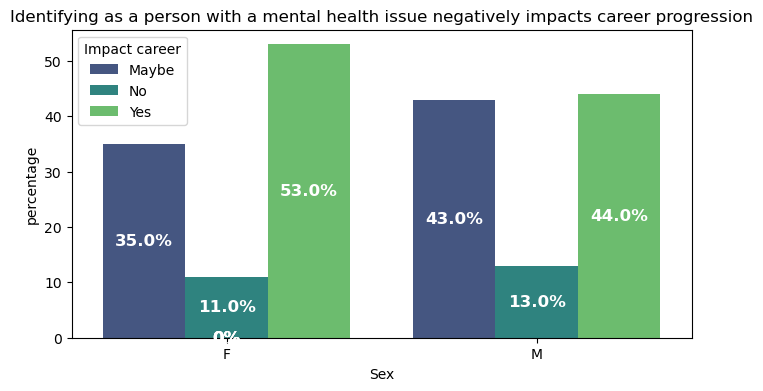

In [33]:
#Normalized
# Group by 'sex' and 'mental_health_career_impact', and count the occurrences
grouped = df_2016.groupby(["sex", "mental_health_career_impact"])["mental_health_career_impact"].count()
total_per_sex = df_2016.groupby("sex")["mental_health_career_impact"].count()

# Calculate the percentage
percentage_diagnosed1 = (grouped / total_per_sex * 100).round(0).astype(int).reset_index(name='percentage')

# Rename columns for clarity
percentage_diagnosed1.columns = ['sex', 'mental_health_career_impact', 'percentage']

# Create the bar plot
plt.figure(figsize=(8,4))
bar_plot = sns.barplot(x='sex', y='percentage', hue='mental_health_career_impact', data=percentage_diagnosed1, palette='viridis')

# Annotate the bars with the percentage values inside the bars
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_height()}%', 
                      (p.get_x() + p.get_width() / 2., p.get_height() / 2),  
                      ha = 'center', va = 'center', 
                      color='white', 
                      fontsize=12,  
                      weight='bold')  

# Set plot title, labels, and legend
plt.title('Identifying as a person with a mental health issue negatively impacts career progression')
plt.xlabel('Sex')
plt.legend(title='Impact career')
plt.show()

In [34]:
df_2016.coworkers.isnull () .sum ()

268

In [35]:
#'Would you feel comfortable discussing a mental health disorder with your coworkers?'
df_2016.coworkers.unique ()

array(['Maybe', nan, 'Yes', 'No'], dtype=object)

In [36]:
df_2016['coworkers'] = df_2016['coworkers'].fillna('Maybe')
#df_2016.discuss_mental_health_coworkers.unique ()

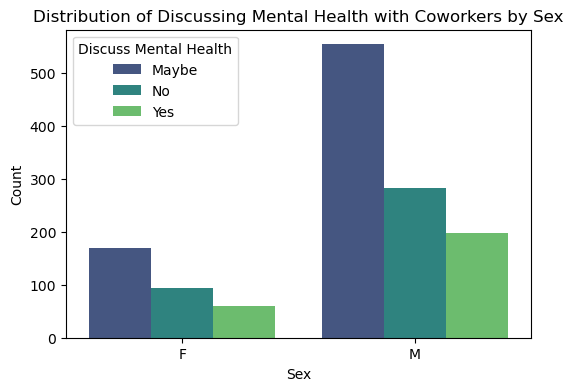

In [37]:
#Without normalizing
# Count the occurrences
count_df = df_2016.groupby(['sex', 'coworkers']).size().reset_index(name='Count')

# Plotting the data
plt.figure(figsize=(6,4))
sns.barplot(x='sex', y='Count', hue='coworkers', data=count_df, palette='viridis')
#(kind='barh', stacked=False, figsize=(8,4), colormap='tab10')
plt.title('Distribution of Discussing Mental Health with Coworkers by Sex')
plt.xlabel('Sex')
#plt.ylabel('Number of People')
#new_labels = ['Not Discuss', 'Discuss']
plt.legend(title='Discuss Mental Health')
plt.show()

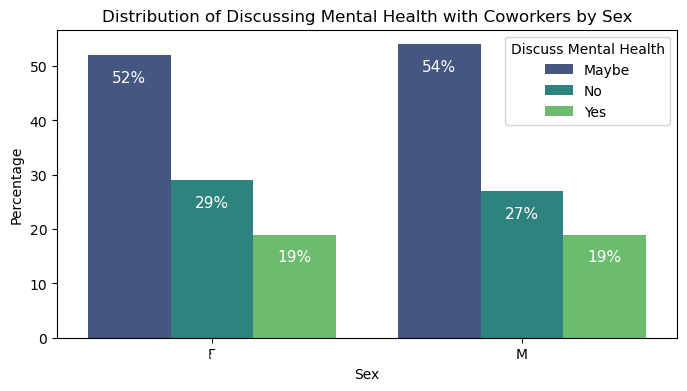

In [38]:
#Normalized
# Count the occurrences
grouped = df_2016.groupby(["sex", "coworkers"])["coworkers"].count()
total_per_sex = df_2016.groupby("sex")["coworkers"].count()
percentage_diagnosed = (grouped / total_per_sex * 100).round(0).astype(int).reset_index(name='percentage')

# Ensure the DataFrame for plotting has the necessary columns
percentage_diagnosed.columns = ['sex', 'coworkers', 'percentage']

# Plotting the data
plt.figure(figsize=(8, 4))
ax = sns.barplot(x='sex', y='percentage', hue='coworkers', data=percentage_diagnosed, palette='viridis')

# Adding percentage labels inside the bars
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width() / 2., 
        height - 5,                     
        f'{int(height)}%',               
        ha="center",                     
        color="white",                   
        fontsize=11                      
    )

# Customizing the plot
plt.title('Distribution of Discussing Mental Health with Coworkers by Sex')
plt.xlabel('Sex')
plt.ylabel('Percentage')
plt.legend(title='Discuss Mental Health')
plt.show()

In [39]:
#4. Hypothesis: Employees with a family history of mental illness are more likely to have sought treatment for mental health issues.

#df_2016.family_mental_health_history.unique()
#df_2016.sought_mental_health_treatment.unique ()
#df_2016.past_mental_health.unique ()
#df_2016.current_mental_health.unique ()

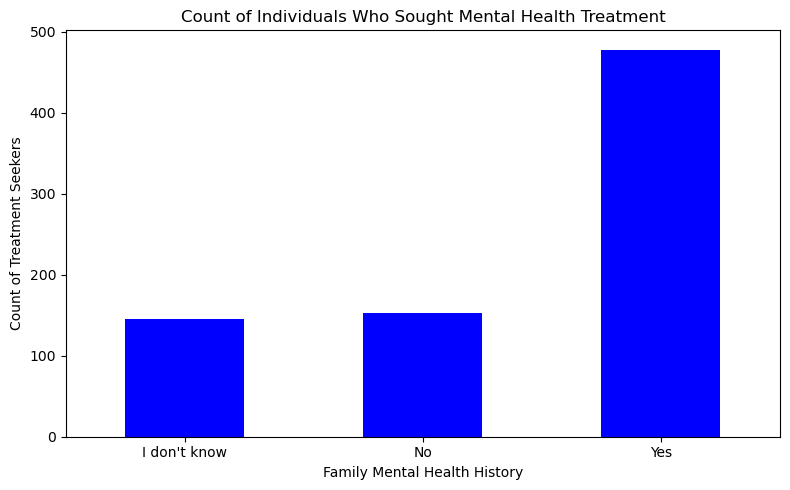

In [40]:
#grouped_data = df_2016.groupby('family_mental_health_history')['sought_mental_health_treatment', 'past_mental_health_count'].sum()
grouped_data = df_2016.groupby('family_history')['sought_treatment'].sum()

# Plotting the bar chart
grouped_data.plot(kind='bar', color=['blue'], figsize=(8, 5))

# Adding titles and labels
plt.title('Count of Individuals Who Sought Mental Health Treatment')
plt.xlabel('Family Mental Health History')
plt.ylabel('Count of Treatment Seekers')
plt.xticks(rotation=0)  # Keep x labels horizontal

# Show plot
plt.tight_layout()
plt.show()

In [41]:
# Convert the array to a pandas DataFrame
df_2016_new = pd.DataFrame(df_2016, columns=['diagnosed_conditions_detail'])

# Drop or fill NaN values
df_2016_new.dropna(inplace=True)  # Dropping rows with NaN values

# Split the conditions and count occurrences
split_conditions = df_2016_new['diagnosed_conditions_detail'].str.split('|', expand=True).stack().str.strip()

# Count the occurrences of each condition
condition_counts = split_conditions.value_counts()

print(condition_counts)

Mood Disorder (Depression, Bipolar Disorder, etc)                                    487
Anxiety Disorder (Generalized, Social, Phobia, etc)                                  348
Attention Deficit Hyperactivity Disorder                                             123
Post-traumatic Stress Disorder                                                        63
Obsessive-Compulsive Disorder                                                         36
Stress Response Syndromes                                                             27
Personality Disorder (Borderline, Antisocial, Paranoid, etc)                          25
Substance Use Disorder                                                                24
Eating Disorder (Anorexia, Bulimia, etc)                                              16
Addictive Disorder                                                                    13
Psychotic Disorder (Schizophrenia, Schizoaffective, etc)                               8
Dissociative Disorder

C:\Users\lored\AppData\Local\Temp\ipykernel_19232\3033597970.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=condition_counts.index, x=condition_counts.values, palette='viridis')


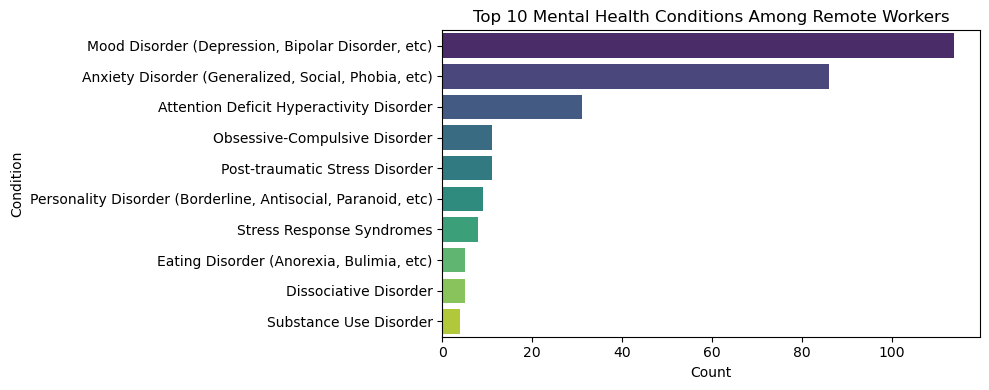

In [42]:
# Filter for people who "always" work remotely
df_remote = df_2016[(df_2016['remote_work'] == 'Always') ]
# Split conditions and expand the DataFrame
split_conditions = df_remote['diagnosed_conditions_detail'].str.split('|', expand=True).stack().str.strip().reset_index(level=1, drop=True)
df_expanded_remote = df_remote.drop('diagnosed_conditions_detail', axis=1).join(split_conditions.rename('Condition'))



# Group by 'sex' and 'mental_health_career_impact', and count the occurrences
grouped_remote = df_expanded_remote.groupby(["remote_work", "Condition"])["Condition"].count()
total_per_remote = df_expanded_remote.groupby("remote_work")["Condition"].count()

# Calculate the percentage
percentage_diagnosed1 = (grouped_remote / total_per_remote * 100).round(0).astype(int).reset_index(name='percentage')

# Rename columns for clarity
percentage_diagnosed1.columns = ['remote_work', 'Condition', 'percentage']



# Count occurrences of each condition
condition_counts = df_expanded_remote['Condition'].value_counts().head(10)

# Plotting the data with horizontal bars
plt.figure(figsize=(10,4))
sns.barplot(y=condition_counts.index, x=condition_counts.values, palette='viridis')
plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title('Top 10 Mental Health Conditions Among Remote Workers')
plt.xlabel('Count')
plt.ylabel('Condition')
plt.tight_layout()

# Show the plot
plt.show()

C:\Users\lored\AppData\Local\Temp\ipykernel_19232\649133793.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=condition_percentages.index, x=condition_percentages.values, palette='viridis')


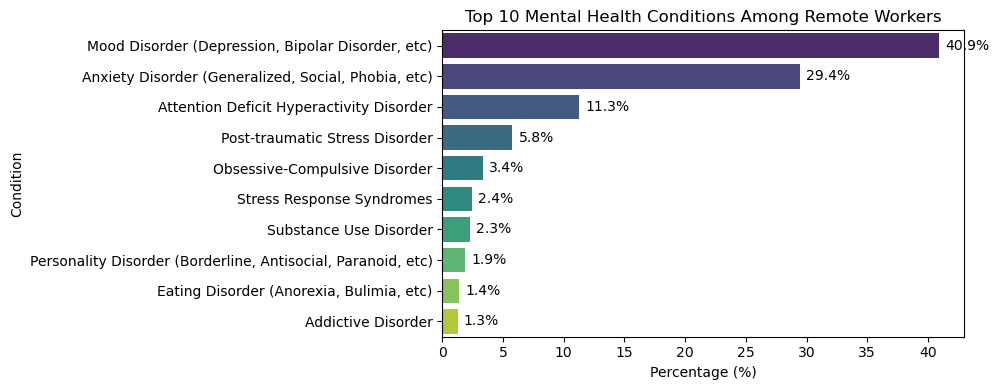

In [43]:
# Filter for people who "always" or "sometimes" work remotely
df_remote = df_2016[(df_2016['remote_work'] == 'Always')| (df_2016['remote_work'] == 'Sometimes') ]
# Split conditions and expand the DataFrame
split_conditions = df_remote['diagnosed_conditions_detail'].str.split('|', expand=True).stack().str.strip().reset_index(level=1, drop=True)
df_expanded_remote = df_remote.drop('diagnosed_conditions_detail', axis=1).join(split_conditions.rename('Condition'))


# Count occurrences of each condition and calculate the percentage
condition_counts = df_expanded_remote['Condition'].value_counts().head(10)
condition_percentages = (condition_counts / condition_counts.sum()) * 100

# Plotting the data with horizontal bars using percentages
plt.figure(figsize=(10, 4))
sns.barplot(y=condition_percentages.index, x=condition_percentages.values, palette='viridis')

# Annotating the bars with the percentage values
for index, value in enumerate(condition_percentages.values):
    plt.text(value + 0.5, index, f'{value:.1f}%', va='center')

plt.yticks(rotation=0)  # Keep y-axis labels horizontal
plt.title('Top 10 Mental Health Conditions Among Remote Workers')
plt.xlabel('Percentage (%)')
plt.ylabel('Condition')
plt.tight_layout()

# Show the plot
plt.show()

In [44]:
#grouped_remote = df_expanded_remote.groupby(["remote_work", "Condition"])["Condition"].count()
print (total_per_remote)

remote_work
Always    297
Name: Condition, dtype: int64


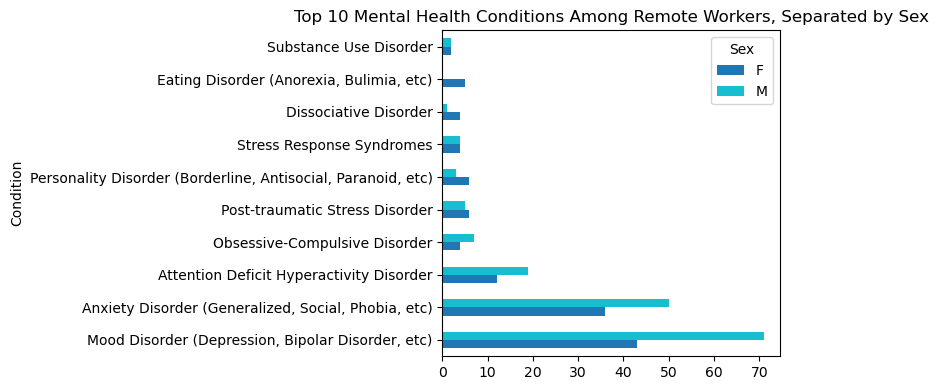

In [45]:
# Drop rows with NaN conditions
df_2016.dropna(subset=['diagnosed_conditions_detail'], inplace=True)

# Filter for people who "always" work remotely
df_remote = df_2016[df_2016['remote_work'] == 'Always']

# Split conditions and expand the DataFrame
split_conditions = df_remote['diagnosed_conditions_detail'].str.split('|', expand=True).stack().str.strip().reset_index(level=1, drop=True)
df_expanded_remote = df_remote.drop('diagnosed_conditions_detail', axis=1).join(split_conditions.rename('Condition'))

# Count occurrences of each condition by sex
condition_sex_counts = df_expanded_remote.groupby(['Condition', 'sex']).size().unstack(fill_value=0)


# Get the top 10 conditions
top_conditions = condition_sex_counts.sum(axis=1).nlargest(10).index
condition_sex_counts_top10 = condition_sex_counts.loc[top_conditions]

# Plotting the data
#
#condition_sex_counts_top10.plot(kind='bar', stacked=False, figsize=(14, 8), colormap='viridis')

# Plotting the data with horizontal bars
ax = condition_sex_counts_top10.plot(kind='barh', stacked=False, figsize=(8,4), colormap='tab10')

plt.title('Top 10 Mental Health Conditions Among Remote Workers, Separated by Sex')
#plt.xlabel('Count')
#plt.ylabel('Condition')
plt.legend(title='Sex')
plt.tight_layout()

# Show the plot
plt.show()